Step 1: Data loaded successfully from '/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_study_cohort.csv'.
Target column identified as: 'sex_0male_1female'
Dropped potential ID columns: []
Step 2: Data cleaning is complete and verified.
Step 3: Generating visualizations...


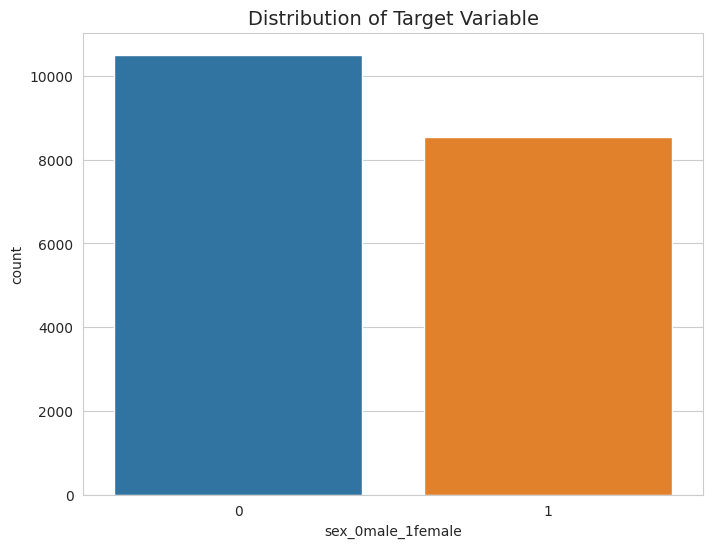

Step 4: Data successfully split into training and testing sets.

--- Training Random Forest Classifier ---
Step 5: Model training complete.

Model Accuracy: 0.5723

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67      2101
           1       0.54      0.31      0.40      1710

    accuracy                           0.57      3811
   macro avg       0.56      0.55      0.53      3811
weighted avg       0.56      0.57      0.55      3811


Step 6: Module complete. Model saved successfully as 'sepsis_model.pkl'


In [3]:
# ==============================================================================
# SECTION 1: SETUP AND AUTOMATED DATA LOADING
# ==============================================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# This script automatically finds the correct CSV file path.
file_path = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            break
    if file_path:
        break

if not file_path:
    raise FileNotFoundError("ERROR: No CSV file found. Please ensure the dataset is attached to the notebook.")

df = pd.read_csv(file_path)
print(f"Step 1: Data loaded successfully from '{file_path}'.")

# ==============================================================================
# SECTION 2: DYNAMIC COLUMN IDENTIFICATION & ROBUST CLEANING
# ==============================================================================
# Intelligently find the target column (assuming it's the main binary flag)
target_column = None
for col in df.columns:
    if df[col].nunique() == 2 and df[col].dtype in ['int64', 'float64']:
        target_column = col
        break
if target_column is None:
    raise ValueError("Could not automatically identify the binary target column.")
print(f"Target column identified as: '{target_column}'")

# Intelligently find potential ID columns to drop
id_columns = [col for col in df.columns if 'id' in col.lower()]
df.drop(columns=id_columns, inplace=True, errors='ignore')
print(f"Dropped potential ID columns: {id_columns}")

# Robustly fill missing values (NaNs) and fix the FutureWarning
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())

# Verify cleaning
assert df.isnull().sum().sum() == 0, "Error: Missing values still exist after cleaning!"
print("Step 2: Data cleaning is complete and verified.")

# ==============================================================================
# SECTION 3: VISUALIZATION (USING DYNAMIC COLUMN NAME)
# ==============================================================================
print("Step 3: Generating visualizations...")
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title('Distribution of Target Variable', fontsize=14)
plt.show()

# ==============================================================================
# SECTION 4: DATA PREPARATION
# ==============================================================================
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Step 4: Data successfully split into training and testing sets.")

# ==============================================================================
# SECTION 5: MODEL TRAINING & EVALUATION
# ==============================================================================
print("\n--- Training Random Forest Classifier ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Step 5: Model training complete.")
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ==============================================================================
# SECTION 6: SAVE THE FINAL MODEL
# ==============================================================================
filename = 'sepsis_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
print(f"\nStep 6: Module complete. Model saved successfully as '{filename}'")

In [4]:
import pickle

# This assumes your trained model is stored in a variable named 'model'
filename = 'sepsis_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Sepsis model saved successfully as '{filename}'")

Sepsis model saved successfully as 'sepsis_model.pkl'
